# <center><u>Prediction of Employee Attrition</u></center>


## <u>Introduction</u>

Employee Attrition is one of the important aspect for any company since employees are the valuable resources for all the companies. If it is possible for companies to predict the nature of employees from which it can be identified that whether the particular employee is going to quit the company or not and also the reasons behind employee attrition. 

## <u>Contents</u>

- [Section 2 (Overview)](#2) Outlines our methodology. 
- [Section 3 (Data Preparation)](#3) Summarizes the data preparation process and our model evaluation strategy. 
- [Section 4 (Exploration)](#4) Exploration of the Dataset. 
- [Section 5 (Feature Selection and Ranking)](#5) Extracting important features for prediction of target 
- [Section 6 (Model Fitting & Hyperparameter Tuning)](#6) Describes the hyperparameter tuning process for each classification algorithm. 
- [Section 7 (Performance Comparison)](#7) Model performance comparison results.
- [Section 8 (Assumptions, Limitations and Strengths)](#8) Discusses limitations, assumptions and Strengths of our approach and possible solutions. 
- [Section 9 (Summary & Conclusion)](#9) Provides a brief summary and conclusion of our work in this project.

## <u>Overview</u> <a class="anchor" id="2"></a> 


### Data Source

* Dataset used for this project is taken from Kaggle.com https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
* This Data repository provides the Employee Attrition data which has 35 Columns and 1470 observations.

### Data Description

The variable descriptions below are from `Attrition.csv` file:

* `Age:` continuous
* `Attrition:` categorical: Yes,No
* `BusinessTravel:` categorical: Travel_Rarely,Travel_Frequently,Non-Travel
* `DailyRate:` continuous   
* `Department:` categorical: Sales,Research & Development,Human Resources
* `DistanceFromHome:` continuous
* `Education:` categorical: 1 (Below College),2 (College),3 (Bachelor),4 (Master),5 (Doctor)
* `EducationField:` categorical: Life Sciences,Other,Medical,Marketing,Technical Degree,Human Resources
* `EmployeeCount:` continuous
* `EmployeeNumber:` continuous
* `EnvironmentSatisfaction:` categorical: 1 'Low',2 'Medium',3 'High',4 'Very High'
* `Gender:`categorical: Male,Female
* `HourlyRate:` continuous
* `JobInvolvement:` categorical: 1 'Low',2 'Medium',3 'High',4 'Very High'
* `JobLevel:` continuous
* `JobRole:` categorical: Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,                      Manager,Sales Representative,Research Director,Human Resources
* `JobSatisfaction:` categorical: 1 'Low',2 'Medium',3 'High',4 'Very High'
* `MaritalStatus:` categorical: Single,Married,Divorced
* `MonthlyIncome:` continuous
* `MonthlyRate:` continuous
* `NumCompaniesWorked:` continuous
* `Over18:` Y
* `OverTime:` Yes, No
* `PercentSalaryHike:` continuous
* `PerformanceRating:` categorical: 1 'Low',2 'Good',3 'Excellent',4 'Outstanding'
* `RelationshipSatisfaction:` categorical: 1 'Low',2 'Medium',3 'High',4 'Very High'
* `StandardHours:` continuous
* `StockOptionLevel:` continuous
* `TotalWorkingYears:` continuous
* `TrainingTimesLastYear:` continuous
* `WorkLifeBalance:` categorical: 1 'Bad',2 'Good',3 'Better,'4 'Best'
* `YearsAtCompany:` continuous
* `YearsInCurrentRole:` continuous
* `YearsSinceLastPromotion:` continuous
* `YearsWithCurrManager:` continuous


### Project Objective

* Our goal is to predict the factors that leads to Employee Attrition in a company.
* The objective of this case study is to fit and compare five different classifiers to predict the factors that lead to Employee Attrition.

### Target Feature

* In this project target feature is `Attrition` which is a binary feature with values `Yes` and `No`. Since target feature is binary and the goal is to classify employee attrition so this is binary classification problem. 

### Methodology
 
For this Binary classification problem following five classifiers are considered to predict the target feature.

* K-Nearest Neighbors (KNN)
* Decision trees (DT)
* Naive Bayes (NB)
* Random Forest (RF)
* Support Vector Machines (SVM)

#### Data Preparation:

Dataset is usually in raw format so first we are processing dataset to remove any inconsistencies in the data. Data types of all the features will be checked for the correctness of data. Next we are checking for the missing values and outliers in dataset. Unique values of categorical features will be checked for any typos, extra whitespaces. Range of numerical features will be checked to perform sanity check and identify any inconsistencies in data.

#### Data Exploration:

Once data is prcossed then in data exploration part will try to get some meaningful insights from the data. In this part one variable, two variable and three variable plot are plotted to understand the data and how descriptive features are related to target feature. For plotting categorical features bar charts are used, for categorical and numerical pair boxplot is used to obatain relationship between features.

#### Data Modelling:

In this part first the data is transformed using encoding and scaling techniques. For encoding nominal features one hot encoding is used, for ordinal features integer encoding is used, target feature is encoded in such a way that positive class is encoded as 1 since this is binary classification problem. To make sure that all the features are in same range they are normalized using Min Max Scaler.

To compare different model performances hold out sampling method is used in which we split the dataset into training and test sets with a 70:30 ratio. Since the ratio of target feature is not balanced, stratification is used to distribute the data proportionally within train and test datasets.

- The 70% i.e. 1029 rows of data are used during the hyperparameter tuning phase which is called the **training data**.
- The 30% i.e. 441 rows of data are used during the performance comparison phase which is called the **test data**.

#### Feature Selection and Ranking:

In this part we will obtain ten most important features with respect to target feature. Ten most important features will be obtained using F-Score method which is one of the filter based method. 

#### Hyperparameter Tuning & Model Fitting:

Before selecting any particular algorithm it is necessary to tune the hyperparameters from which the optimal values for hyperparameters will be obtained. All three feature selection techniques Mutual Information,F-Score and Random Forest Importance with 10, 20, 30 and full set of features are used in one pipeline along with hyperparameters of each of the algorithms. To remove any bias from the dataset we are using 5-fold stratified cross-validation technique with two repetations to tune the hyperparameters. Because of class imbalance, area under curve (AUC) performance metric is used to compare the performance to different algorithms. GridSearchCV will be used to check for all the possible combinations of hyperparameters to obtain the maximum efficiency.

#### Performance Comparison:

After tuning classifiers for the optimal hyperparameter values, we fit them on the test data utilizing 10-folds stratified cross-validation with two repetitions. Paired t-test will be performed to check for the statistical significance of scores. In this problem our goal is to predict the Attrition so will also take into consideration of other performance metrics such as recall.

## <u>Data Preparation</u> <a class="anchor" id="3"></a> 

### Loading Dataset & Packages 

* In this step data and basic required packages are loaded.
* Checking shape, column names and data type of all the variables to see if the data is loaded in correct format.

In [1]:
#loading packages
# Set a seed value
seed_value = 999 
# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# 3. Initialise Numpy's pseudo-random generator
import numpy as np
np.random.seed(seed_value)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading the data from the csv file.
data = pd.read_csv('s3796753_Data.csv', header = 0)

#displaying 5 observations from the dataset
pd.set_option('display.max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0
1,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0
2,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0
3,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0
4,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0


In [2]:
# Checking the size of the data frame.
data.shape

(1470, 35)

In [3]:
#checking data types of all the varaibles
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Dropping Constant Features

* In this step all the features which have only one unique value for all the observations are dropped since these features are not useful of analysis.

In [4]:
data = data.loc[:, data.nunique() != 1]

### Dropping ID-Like Columns

* In this step `EmployeeNumber` which is ID-like feature is dropped since this feature is irreleavent for predictions.

In [5]:
#removing id like columns
data = data.drop(columns='EmployeeNumber')

### Checking for Missing Values

* In this step checking for any missing values in the dataset.

In [6]:
#checking for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

* It is observed that there are no any missing values in the dataset.
* In Below cell will also check for any duplicate observations in the dataset.

### Checking for duplicate observations

In [7]:
#checking for duplicate observations
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool>

### Checking typos, extra whitespaces and inconsistencies in categorical Features.

* Let's have a look at the unique values of the categorical columns. In Pandas, string types are of data type "object", and usually these would be the categorical features.
* By observing unique values in categorical features any typos or data inconsistencies can be identified.

In [8]:
categorical_cols = data.columns[data.dtypes == np.object].tolist()
for col in categorical_cols:
    print("Column Name:"+col)
    print(data[col].unique())
    print("")

Column Name:Attrition
['Yes' 'No']

Column Name:BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column Name:Department
['Research & Development' 'Sales' 'Human Resources']

Column Name:EducationField
['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']

Column Name:Gender
['Male' 'Female']

Column Name:JobRole
['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']

Column Name:MaritalStatus
['Single' 'Divorced' 'Married']

Column Name:OverTime
['No' 'Yes']



* From unique values it is observed that there are no any inconsistencies in this dataset.

### Outliers

* We checked for outliers in numerical features. By observing these features it was identified that there are no any invalid outliers(noise) in the dataset. We observed that there are few high values(valid outliers) but these values are useful for predicting target as if these values are removed it will have an impact on the analysis.
* For e.g. there is one column `NumCompaniesWorked` which has few higher values, employees who have worked for more number of companies are tend to be very less in number so these values might be useful for predicting Attrition. 

### Discretizing numerical features

* `Age` column has been discretized in to three categories `young, middle_aged` and `old` for analysis.
* Similarly `DistanceFromHome` is also discretized into three categories `near, mid_distant` and `far`.
* `MonthlyIncome` is discritized into three categories `low_income, mid_income` and `high_income`.
* These three features are discritized because for predicting Attrition, because information such as whether employee has low income or high income is used rather than actual income value. Same for Age and DistanceFromHome.

In [9]:
#discretizing numerical features
data['Age'] = pd.qcut(data['Age'], q=3,labels=['young', 'middle_aged', 'old'])
data['DistanceFromHome'] = pd.qcut(data['DistanceFromHome'], q=3,labels=['near', 'mid_distant', 'far'])
data['MonthlyIncome'] = pd.qcut(data['MonthlyIncome'], q=3,labels=['low_income', 'mid_income', 'high_income'])

Target variable is pushed to the last column in the data set for our convenience to identify target easily in future.

In [10]:
#moving target columnn to end 
data = data[[col for col in data.columns if col not in ['Attrition']] + ['Attrition']]

## <u>Data Exploration</u> <a class="anchor" id="4"></a>

In this step, we explore data using graphical analysis and summary statistics.

* [Univariate analysis](#univariate),
* [Bivariate analysis](#bivariate) 
* [Multivariate analysis.](#multivariate)

### Summary Statistics

* In this step summary statistics of numerical features is performed to check for any invalid values.
* Range of each numerical features is observed to check for any inconsistencies.

In [11]:
data.describe(include = np.number).round(2)

,DailyRate,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,802.49,2.91,2.72,65.89,2.73,2.06,2.73,14313.10,2.69,15.21,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,403.51,1.02,1.09,20.33,0.71,1.11,1.10,7117.79,2.50,3.66,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,102.00,1.00,1.00,30.00,1.00,1.00,1.00,2094.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,465.00,2.00,2.00,48.00,2.00,1.00,2.00,8047.00,1.00,12.00,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,802.00,3.00,3.00,66.00,3.00,2.00,3.00,14235.50,2.00,14.00,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,1157.00,4.00,4.00,83.75,3.00,3.00,4.00,20461.50,4.00,18.00,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,1499.00,5.00,4.00,100.00,4.00,5.00,4.00,26999.00,9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


### Univariate Analysis<a id = "univariate"></a>

In this step, we are looking at the features individually to check any patterns in the data.

* In Figure 1, we look at `Business Travel` and `Department`. Here, we find that the frequency of people travelling rarely are more than double of the non travellers and frequently travellers combined.
* In Figure 2, Research and Development  has the highest number of employees which is followed by Sales department.

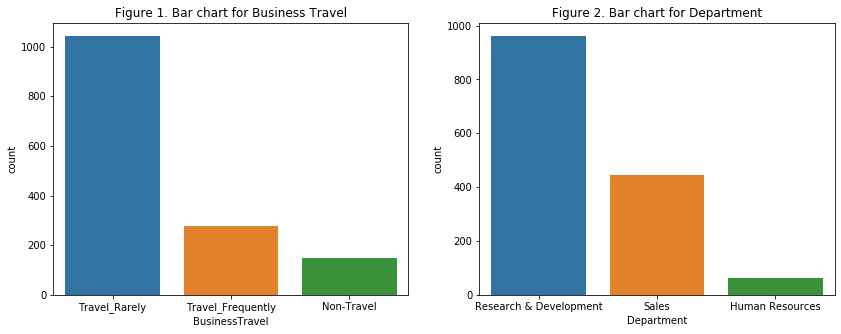

In [12]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data['BusinessTravel'], ax=ax[0]).set_title("Figure 1. Bar chart for Business Travel");
sns.countplot(data['Department'], ax=ax[1]).set_title("Figure 2. Bar chart for Department");

* In Figure 3, we look at `Environment Satisfaction`. We find that the majority of employees come in the top two levels of satisfaction metric.
* In Figure 4 the `Education Field`, most of the employees come with background in Life Sciences, Medical and Marketing. There are some employees from Technical Degree, Human Resources and others.

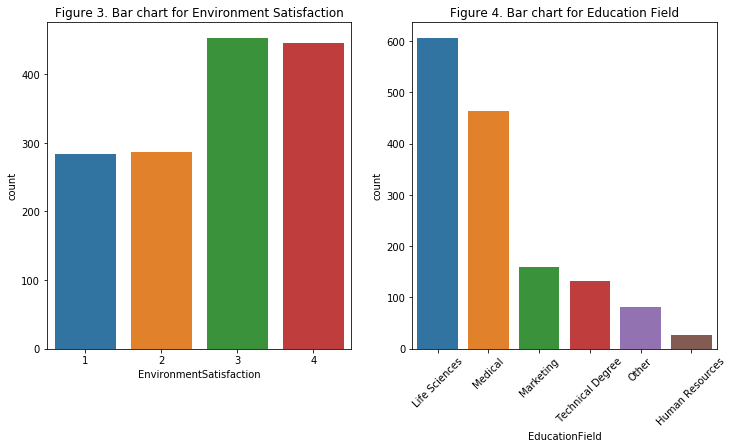

In [13]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data['EnvironmentSatisfaction'], ax=ax[0]).set_title("Figure 3. Bar chart for Environment Satisfaction");
sns.countplot(data['EducationField'], ax=ax[1]).set_title("Figure 4. Bar chart for Education Field");
plt.xticks(rotation=45);

* By looking at figure 5  bar chart for `Gender`, we find that sex ratio is inclined towards Male.
* By looking at figure 6 the bar chart for `Job Involvement`, we can infer that employees describe their job involvement as HIGH.

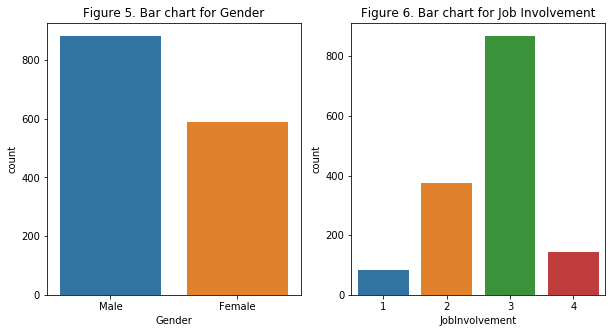

In [14]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data['Gender'], ax=ax[0]).set_title("Figure 5. Bar chart for Gender");
sns.countplot(data['JobInvolvement'], ax=ax[1]).set_title("Figure 6. Bar chart for Job Involvement");

* Next, figure 7 for Job Satisfaction, majority of employees come in the top two levels of satisfaction. Two levels of satisfaction metric.
* Figure 8 shows that, Around one-third of total employees do overtime.

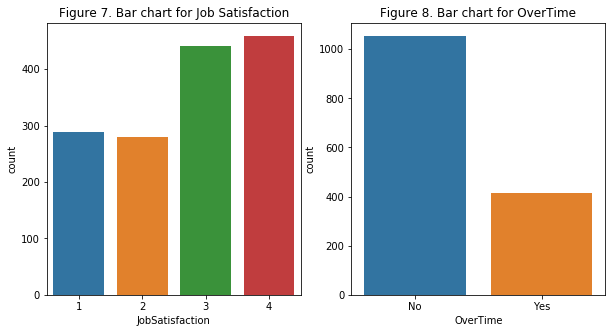

In [15]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data['JobSatisfaction'], ax=ax[0]).set_title("Figure 7. Bar chart for Job Satisfaction");
sns.countplot(data['OverTime'], ax=ax[1]).set_title("Figure 8. Bar chart for OverTime");

* By looking at the figure 9 for Performance Rating, only a few employees have received the highest rating of 4.
* By looking at the figure 10 for Attrition, we find that only few employees are leaving.

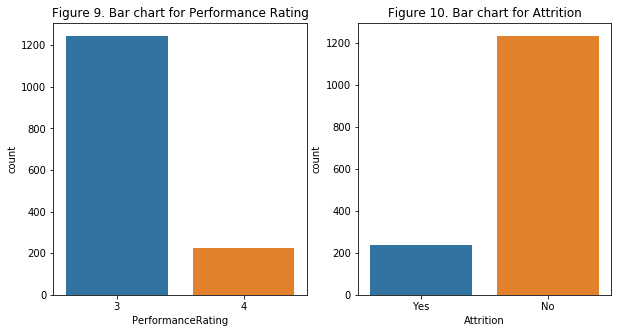

In [16]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data['PerformanceRating'], ax=ax[0]).set_title("Figure 9. Bar chart for Performance Rating");
sns.countplot(data['Attrition'], ax=ax[1]).set_title("Figure 10. Bar chart for Attrition");

### Bi-variate analysis<a id = "bivariate"></a>

In this exploratory task, we are trying to find patterns in two features and any relationship between them simultaneously.

* The Figure 11 is, `Education` and `Department`. Most of the Bachelors work in Research & Development Department. Education level 3 bachelors have the most jobs in any department.
* In Figure 12, It shows the initial job levels, there are many young people. As the job level increases, the senior employees are employed for higher job levels.

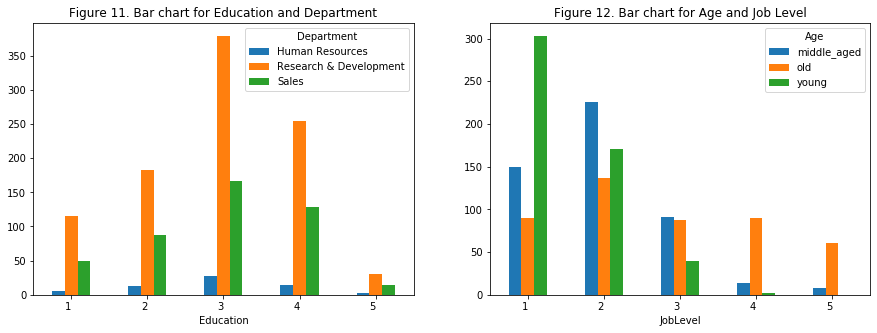

In [17]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(1,2,1)
x = data.groupby(['Education','Department'])['Education'].size().unstack()
a = x.plot.bar(ax=ax, title='Figure 11. Bar chart for Education and Department');
a.set_xticklabels(a.get_xticklabels(),rotation=360,ha="right");

ax = f.add_subplot(1,2,2)
age_joblevel = data['Age'].groupby(data['JobLevel']).value_counts()
b = age_joblevel.unstack(1).plot.bar(ax=ax, title='Figure 12. Bar chart for Age and Job Level');
b.set_xticklabels(b.get_xticklabels(),rotation=360,ha="right");

* Next up, Figure 13 is the relationship between `Business Travel` and `Attrition`. The non-travellers have least amount of attrition. The employees who travel rarely have highest amount of attrition. This suggests that employees who might not get on-site opportunity might result into attrition.
* In Figure 14, For the relationship between `Job Level` and `Attrition`, employees who belong to low job levels are more in number of attrition. This could be a case of terminating junior employees or employees giving resignations to switch to another firm.

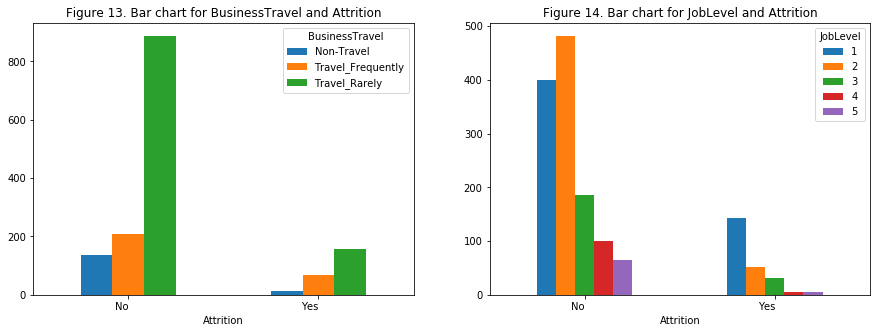

In [18]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(1,2,1)
age_jobrole = data['BusinessTravel'].groupby(data['Attrition']).value_counts()
a = age_jobrole.unstack(1).plot.bar(ax=ax, title='Figure 13. Bar chart for BusinessTravel and Attrition')
a.set_xticklabels(a.get_xticklabels(),rotation=360,ha="right");

ax = f.add_subplot(1,2,2)
age_joblevel = data['JobLevel'].groupby(data['Attrition']).value_counts()
b= age_joblevel.unstack(1).plot.bar(ax=ax, title='Figure 14. Bar chart for JobLevel and Attrition');
b.set_xticklabels(b.get_xticklabels(),rotation=360,ha="right");

* Figure 15 is of `Job Role` and `Age` , Young employees are employed in junior jobs such as Research Scientist and Laboratory Technician. Old employees are employed as Sales Executives and Managers.
* Figure 16: `Age` and `Monthly Income`, As the age increases, the employees transition from low-income level to high income levels increases. This suggests that older people have High Income than younger People.

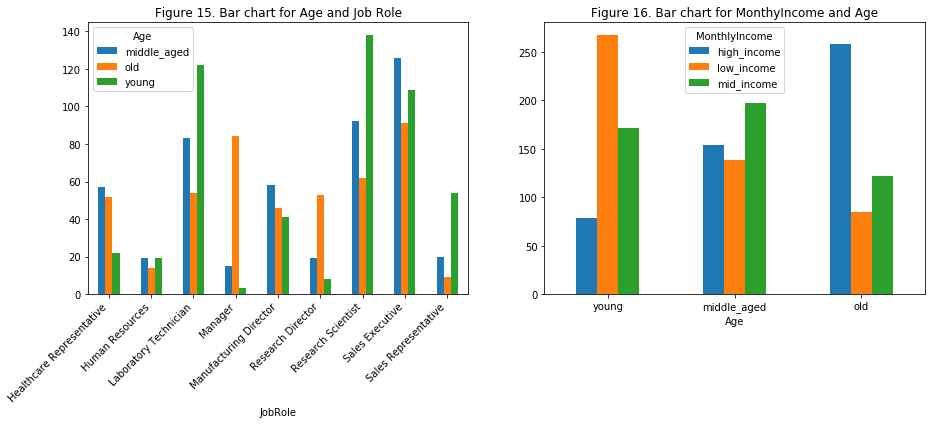

In [19]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(1,2,1)
age_jobrole = data['Age'].groupby(data['JobRole']).value_counts()
a = age_jobrole.unstack(1).plot.bar(ax=ax, title='Figure 15. Bar chart for Age and Job Role');
a.set_xticklabels(a.get_xticklabels(),rotation=45,ha="right");
ax = f.add_subplot(1,2,2)
age_jobrole = data['MonthlyIncome'].groupby(data['Age']).value_counts()
age_jobrole.unstack(1).plot.bar(ax=ax, title='Figure 16. Bar chart for MonthyIncome and Age');
plt.xticks(rotation=360);

* Figure 17 is the relationship between `Job Level` and `Monthly Income`. The pattern here suggests that as the job level increases, only high income employees are required for high level jobs.
* Figure 18 `Job Role` and `Monthly Income`, Research Scientist and Laboratory Technician comes under low income category whereas Manager and Reseacrh Director come under high income category.

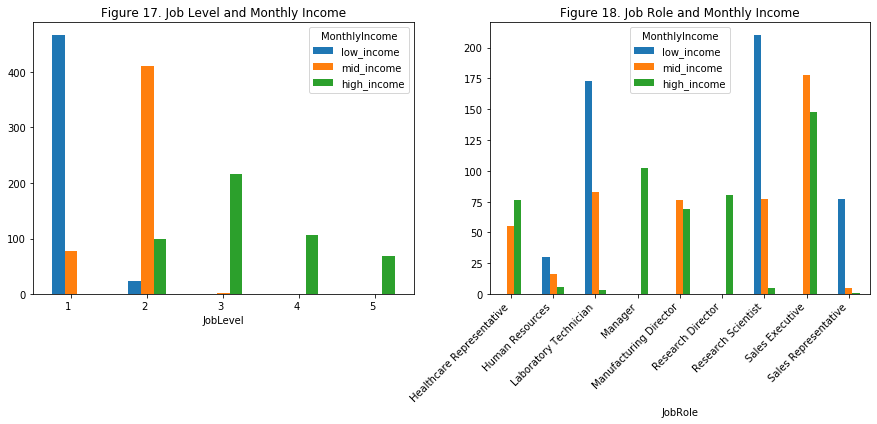

In [20]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(1,2,1)
age_jobrole = data['JobLevel'].groupby(data['MonthlyIncome']).value_counts()
b = age_jobrole.unstack(0).plot.bar(ax=ax, title='Figure 17. Job Level and Monthly Income');
b.set_xticklabels(b.get_xticklabels(),rotation=360,ha="right");

ax = f.add_subplot(1,2,2)
age_jobrole = data['JobRole'].groupby(data['MonthlyIncome']).value_counts()
a=age_jobrole.unstack(0).plot.bar(ax=ax, title='Figure 18. Job Role and Monthly Income')
a.set_xticklabels(a.get_xticklabels(),rotation=45,ha="right");

* For Figure 19, Age and Number of Companies Worked, as the age increases the number of companies that an employee works increases and this shows attrition can be more.
* In Figure 20, as the age increases the number of working years also Increasing.From this we can get the relationship between Age and Working hours. 

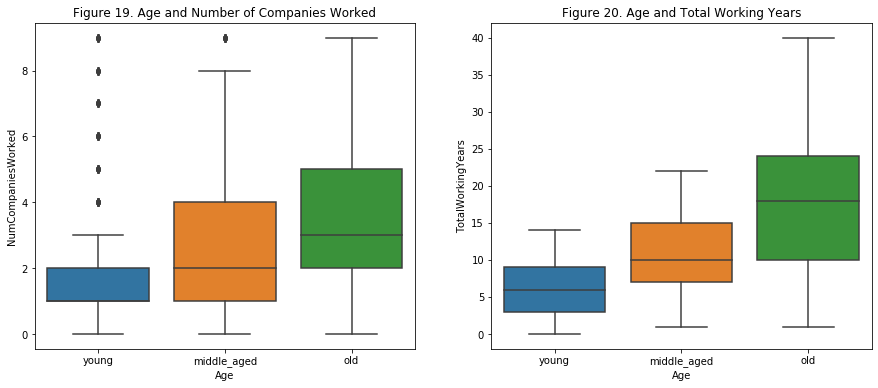

In [21]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data['Age'], data['NumCompaniesWorked'], ax=ax[0]).set_title("Figure 19. Age and Number of Companies Worked");
sns.boxplot(data['Age'], data['TotalWorkingYears'], ax=ax[1]).set_title("Figure 20. Age and Total Working Years");

* Figure 21 shows that Employees who have higher performance rating(in this case, 4), have higher salary hike.
* Figure 22 gives people who have worked for more number of comapines have the high job level.

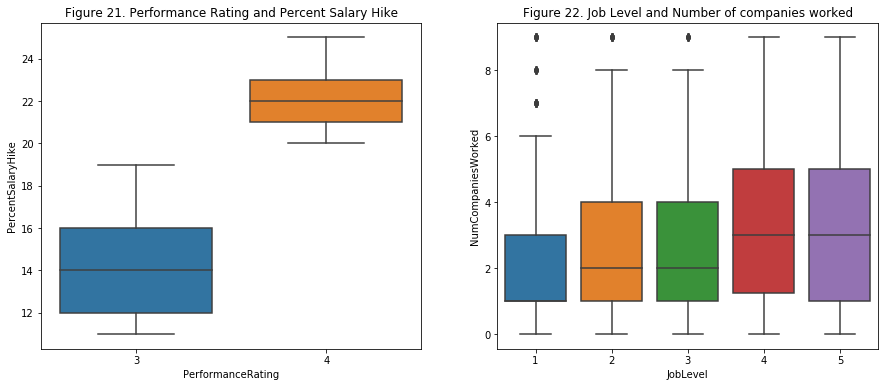

In [22]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data['PerformanceRating'], data['PercentSalaryHike'], ax=ax[0]).set_title("Figure 21. Performance Rating and Percent Salary Hike");
sns.boxplot(data['JobLevel'], data['NumCompaniesWorked'], ax=ax[1]).set_title("Figure 22. Job Level and Number of companies worked");

* For figure 23,It is evident that employees who have higher ratings have less number of attrition.

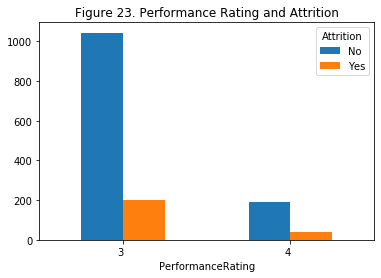

In [23]:
x = data.groupby(['PerformanceRating','Attrition'])['PerformanceRating'].size().unstack()
b = x.plot(kind='bar',title="Figure 23. Performance Rating and Attrition");
b.set_xticklabels(b.get_xticklabels(),rotation=360,ha="right");

### Multivariate plots(3 variables)<a id = "multivariate"></a>

* Figure 24:The people who do not stick with their current manager have more chance of attrition. Some might not like their manager and leave which could cause in result of attrition.
* Figure 25: It shows, Even though people have high percentageSalaryHike for Jobsatisfaction level 2 pleople are leaving the company. It summarises that People who have less Jobsatisfaction are tend to leave the company even though they get high percentage of salary hike.

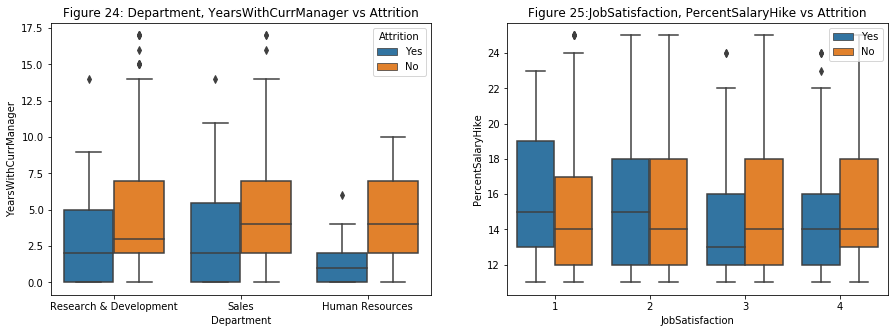

In [24]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
b = sns.boxplot(data['Department'], data['YearsWithCurrManager'], hue = data['Attrition'],ax=ax[0]).set_title("Figure 24: Department, YearsWithCurrManager vs Attrition")
a = sns.boxplot(data['JobSatisfaction'], data['PercentSalaryHike'], hue = data['Attrition'],ax=ax[1])
a.legend(loc = 'upper right')
plt.title('Figure 25:JobSatisfaction, PercentSalaryHike vs Attrition')
plt.show()

* Figure 26:As the number of yearswithcurrentrole increases, Attrition level also increasing with the Education Field as Technical Degree and Other compared to others. 
* Figure 27: People in the initial years of their career are more likely to leave the company or get terminated. Old and middle-aged people are tend to change the company and hence attrition is more, so Numberof Companiesworked are also high.

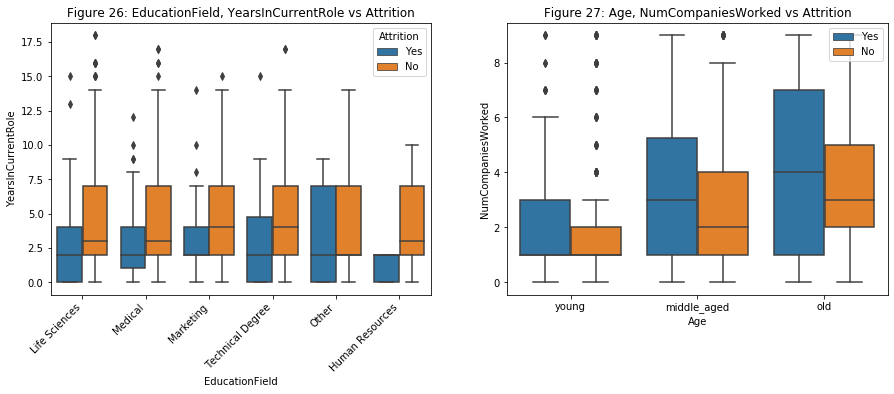

In [25]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
a = sns.boxplot(data['EducationField'], data['YearsInCurrentRole'], hue = data['Attrition'],ax=ax[0])
b = sns.boxplot(data['Age'], data['NumCompaniesWorked'], hue = data['Attrition'],ax=ax[1])
b.legend(loc = 'upper right')
a.set_xticklabels(a.get_xticklabels(),rotation=45, ha='right')
a.set_title("Figure 26: EducationField, YearsInCurrentRole vs Attrition")
plt.title("Figure 27: Age, NumCompaniesWorked vs Attrition")
plt.show()

## <u>Predictive Modelling</u>

### Splitting datasets

* In this step dataset is splitted into two subsets, `Data` which has all the descriptive features and `target` contains target feature.

In [26]:
#splitting descriptive and target data
Data = data.drop(columns='Attrition')
target = data['Attrition']

### Encoding the Target Feature

* In this step target feature is encoded manually using replace function. Label Encoder is not used since it encodes  categories alphabetically.
* Positive class is `Yes` which is encoded as `1`.

In [27]:
#displaying target distribution
target.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [28]:
#encoding target feature
target = target.replace({'No': 0, 'Yes': 1})
target.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Encoding Ordinal features

* This dataset has three ordinal features which are encoded using Integer encoding method

In [29]:
#declaring disctionary
age_mapping = {'young': 0, 'middle_aged': 1, 'old': 2}
distance_mapping = {'near': 0, 'mid_distant': 1, 'far': 2}
income_mapping = {'low_income': 0, 'mid_income': 1, 'high_income': 2}

#Encoding ordinal features
Data['Age'] = Data['Age'].replace(age_mapping)
Data['DistanceFromHome'] = Data['DistanceFromHome'].replace(distance_mapping)
Data['MonthlyIncome'] = Data['MonthlyIncome'].replace(income_mapping)

### Encoding nominal features 

* All the nominal categorical features are encoded uing one-hot encoding method.

In [30]:
#encoding nominal categorical features
nominal_cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in nominal_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
Data = pd.get_dummies(Data)

In [31]:
#displaying first five observations
pd.set_option('display.max_columns',None)
Data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,230,0,3,3,1,54,3,1,3,0,25233,1,0,13,3,3,0,0,2,3,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,812,1,3,4,0,69,2,1,3,0,9724,1,0,12,3,1,0,0,2,3,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1306,1,3,2,1,69,3,1,2,0,8059,1,1,14,3,4,0,0,3,3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,287,1,2,2,1,73,3,1,4,0,13493,1,0,15,3,4,0,0,2,3,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,247,1,1,3,1,80,3,1,3,0,13556,1,0,12,3,4,0,0,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Scaling

* All the descriptive features are scaled using Min-Max scaler.
* All the descriptive featuers are now in range 0 to 1, to remove any bias in the features which has higher values so that it will not imapact the prediction.

In [32]:
#Scaling Descriptive features
from sklearn import preprocessing

Data_df = Data.copy()
Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [33]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1237,1.0,0.071582,0.0,0.25,0.666667,0.0,0.042857,0.666667,0.75,1.000000,1.0,0.437181,0.111111,1.0,0.000000,0.0,0.666667,0.333333,0.650,0.500000,0.333333,0.650,0.777778,0.200000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1345,1.0,0.601288,0.0,0.50,0.000000,0.0,0.328571,0.666667,0.50,0.666667,1.0,0.838787,0.222222,0.0,0.000000,0.0,1.000000,0.000000,0.375,0.333333,0.666667,0.050,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1174,1.0,0.503221,0.5,0.25,0.666667,1.0,0.385714,0.666667,0.25,0.333333,0.5,0.845975,0.111111,0.0,0.071429,0.0,0.333333,0.000000,0.225,0.833333,0.333333,0.225,0.388889,0.000000,0.470588,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
760,0.5,0.598425,0.0,0.75,0.666667,1.0,0.700000,0.666667,0.00,0.666667,0.0,0.409275,0.444444,0.0,0.714286,1.0,0.666667,0.000000,0.400,1.000000,0.666667,0.275,0.444444,0.200000,0.529412,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
139,0.0,0.338583,0.0,0.25,0.000000,0.0,0.585714,0.000000,0.00,1.000000,0.5,0.128247,0.333333,0.0,0.214286,0.0,0.000000,0.333333,0.125,0.333333,0.666667,0.050,0.111111,0.133333,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
type(target)

pandas.core.series.Series

* In sklearn all features including target feature should be numpy array so in this step target feature is converted to numpy array.

In [35]:
#Converting target feature to NumPy array
target = target.values

In [36]:
type(target)

numpy.ndarray

## <u>Feature Selection and Ranking</u> <a class="anchor" id="5"></a>

* In feature selection ten most important features with respect to target are extracted and ranked as per their scores.
* Top Ten important features and their scores are plotted using bar graph.
* F-score method is used to select top ten important features. 
* In this step only one method is used to extract top ten features, in hyperparameter tuning, F-Score, Mutual Information and Random Forest Importance all three methods are used to tune the hyperparameters and also the method which gives highest accuracy is selected for each of different algorithms.

In [37]:
from sklearn import feature_selection as fs

imp_features_num = 10
imp_features_score = fs.SelectKBest(fs.f_classif, k=imp_features_num)
imp_features_score.fit_transform(Data, target)
imp_features_indices = np.argsort(np.nan_to_num(imp_features_score.scores_))[::-1][0:imp_features_num]
imp_features = Data_df.columns[imp_features_indices].values
imp_features

array(['OverTime', 'MaritalStatus_Single', 'MonthlyIncome',
       'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole',
       'JobRole_Sales Representative', 'YearsWithCurrManager', 'Age',
       'StockOptionLevel'], dtype=object)

In [38]:
import altair as alt

imp_features_fscore = imp_features_score.scores_[imp_features_indices]

df = pd.DataFrame({'features': imp_features,'importances': imp_features_fscore})
    
alt.Chart(df, 
    width=500, 
    title='10 Important Features'
    ).mark_bar(opacity=0.75,                       
    color='red').encode(
    alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
    alt.Y('importances', title='Importance'))

alt.Chart(...)

### Test Train split

In [39]:
from sklearn.model_selection import train_test_split

Data_train, Data_test, target_train, target_test = train_test_split(Data, target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target)

print(Data_train.shape)
print(Data_test.shape)

(1029, 49)
(441, 49)


In [40]:
print(target_train.shape)
print(target_test.shape)

(1029,)
(441,)


## <u>Mode Fitting & Hyperparameter Tuning</u> <a class="anchor" id="6"></a>

* In this part we are finding optimal values of hyperparameters for each of the five algorithms.
* 5-Folds cross validation with two repetitions is used, We are using RepeatedStratifiedKFold with to remove any bias and since there is class imabalance in target feature. 
* Pipeline is used to compare different combinations of hyperparamters along with different feature selection methods and number of features to get the maximum efficiency.
* Three feature selection methods F-Score, Mutual Information and Random Forest Importance are used to find optimal number of features and the for each classifier method giving maximum score is selected.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [42]:
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=999)

* RFIFeatureSelector is custom method built over Random forest importance (RFI) method, so that RFI can be included in pipeline process. 
* RFIFeatureSelector method is taken from www.featureranking.com

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

## K-Nearest Neighbors (KNN)

### KNN using F-Score and Mutual Information Feature selection

* Pipeline is created for KNN with two feature selection methods, number of features, values of different hyperparameters like number of neighbours and distance metric. 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline([('fselector', SelectKBest()), 
                     ('knn', KNeighborsClassifier())])

params_KNN = {'fselector__score_func': [f_classif, mutual_info_classif],
                   'fselector__k': [10, 20, 30, Data.shape[1]],
                   'knn__n_neighbors': [80,82,84,86,88,90,92,94,96,98,100],
                   'knn__p': [1, 2]}
 
gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_KNN, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [45]:
gs_pipe_KNN.fit(Data_train, target_train);

Fitting 10 folds for each of 176 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 770 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:  4.8min finished


In [46]:
gs_pipe_KNN.best_score_

0.801887620921103

In [47]:
gs_pipe_KNN.best_params_

{'fselector__k': 49,
 'fselector__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'knn__n_neighbors': 90,
 'knn__p': 1}

In [48]:
results_KNN = pd.DataFrame(gs_pipe_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_pipe_KNN.cv_results_['mean_test_score']
results_KNN = results_KNN.drop(columns='fselector__score_func')
results_KNN = results_KNN.sort_values(by='test_score', ascending=False)

In [49]:
results_KNN.reset_index(inplace = True) 
results_KNN = results_KNN.iloc[0:30,:]

In [50]:
import altair as alt
alt.renderers.enable('html')

alt.Chart(results_KNN, 
          title='KNN top 30 Performance scores using F-score and Mutual Information feature selector'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

In [51]:
pipe_KNN_1 = Pipeline([('fselector', SelectKBest()), 
                     ('knn', KNeighborsClassifier())])

params_KNN_1 = {'fselector__score_func': [f_classif, mutual_info_classif],
                   'fselector__k': [10, 20, 30, Data.shape[1]],
                   'knn__n_neighbors': [100,102,104,106,108,110,112,114,116,118,120],
                   'knn__p': [1, 2]}
 
gs_pipe_KNN_1 = GridSearchCV(estimator=pipe_KNN_1, 
                           param_grid=params_KNN_1, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [52]:
gs_pipe_KNN_1.fit(Data_train, target_train);

Fitting 10 folds for each of 176 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:  3.9min finished


In [53]:
gs_pipe_KNN_1.best_score_

0.805097131056898

In [54]:
gs_pipe_KNN_1.best_params_

{'fselector__k': 49,
 'fselector__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'knn__n_neighbors': 108,
 'knn__p': 1}

In [55]:
results_KNN_1 = pd.DataFrame(gs_pipe_KNN_1.cv_results_['params'])
results_KNN_1['test_score'] = gs_pipe_KNN_1.cv_results_['mean_test_score']
results_KNN_1 = results_KNN_1.drop(columns='fselector__score_func')
results_KNN_1 = results_KNN_1.sort_values(by='test_score', ascending=False)

In [56]:
results_KNN_1.reset_index(inplace = True) 
results_KNN_1 = results_KNN_1.iloc[0:30,:]

In [57]:
alt.Chart(results_KNN_1, 
          title='KNN top 30 Performance scores using F-score and Mutual Information feature selector'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

### KNN using Random Forest Importance Feature selection

In [58]:
pipe_KNN_2 = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_KNN_2 = {'rfi_fs__n_features_': [10, 20, 30, Data.shape[1]],
                   'knn__n_neighbors': [80,82,84,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114,116,118,120],
                   'knn__p': [1, 2]}

gs_pipe_KNN_2 = GridSearchCV(estimator=pipe_KNN_2, 
                           param_grid=params_KNN_2, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [59]:
gs_pipe_KNN_2.fit(Data_train, target_train);

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  4.3min finished


In [60]:
gs_pipe_KNN_2.best_score_

0.809118406952902

In [61]:
gs_pipe_KNN_2.best_params_

{'knn__n_neighbors': 116, 'knn__p': 1, 'rfi_fs__n_features_': 30}

In [62]:
results_KNN = pd.DataFrame(gs_pipe_KNN_2.cv_results_['params'])
results_KNN['test_score'] = gs_pipe_KNN_2.cv_results_['mean_test_score']
results_KNN = results_KNN.drop(columns='rfi_fs__n_features_')
results_KNN = results_KNN.sort_values(by='test_score', ascending=False)

In [63]:
results_KNN.reset_index(inplace = True) 
results_KNN = results_KNN.iloc[0:30,:]

In [64]:
alt.Chart(results_KNN, 
          title='KNN top 30 Performance scores using RFI feature selector'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

* For KNN it is observed that the Feature selection with `Random Forest Importance` with `30` features is giving the maximum accuracy with `116` number of neighbours and `manhattan` distance metric.
* `gs_pipe_KNN_2` is tuned and used below to get the performance on test data.

### KNN performance on Test data

In [65]:
from sklearn.model_selection import cross_val_score

cv_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN_2.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_test, 
                                 n_jobs=-1,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.7387910231660231

## Decision Trees (DT)

### DT using F-Score Feature selection

In [66]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('fselector', SelectKBest(score_func=f_classif)), 
                     ('dt', DecisionTreeClassifier())])

params_DT = {'fselector__k': [10, 20, 30, Data.shape[1]],
                   'dt__criterion': ['gini', 'entropy'],
                   'dt__max_depth': [1, 2, 3, 4, 5, 6],
                   'dt__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                           param_grid=params_DT, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [67]:
gs_pipe_DT.fit(Data_train, target_train);

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   15.0s finished


In [68]:
gs_pipe_DT.best_score_

0.7346247039797722

In [69]:
gs_pipe_DT.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 4,
 'dt__min_samples_split': 3,
 'fselector__k': 10}

In [70]:
results_DT = pd.DataFrame(gs_pipe_DT.cv_results_['params'])
results_DT['test_score'] = gs_pipe_DT.cv_results_['mean_test_score']
results_DT = results_DT.drop(columns='fselector__k')
results_DT = results_DT.sort_values(by='test_score', ascending=False)

In [71]:
results_DT.reset_index(inplace = True) 
results_DT = results_DT.iloc[0:30,:]

In [72]:
alt.Chart(results_DT, 
          title='DT Top 30 Performance score Comparison'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Minimum Samples Split'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

### DT using Mutual Information Feature selection

In [73]:
pipe_DT_1 = Pipeline([('fselector', SelectKBest(score_func=mutual_info_classif)), 
                     ('dt', DecisionTreeClassifier())])

params_pipe_DT_1 = {'fselector__k': [10, 20, 30, Data.shape[1]],
                   'dt__criterion': ['gini', 'entropy'],
                   'dt__max_depth': [1, 2, 3, 4, 5, 6],
                   'dt__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs_pipe_DT_1 = GridSearchCV(estimator=pipe_DT_1, 
                           param_grid=params_pipe_DT_1, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [74]:
gs_pipe_DT_1.fit(Data_train, target_train);

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 17.2min finished


In [75]:
gs_pipe_DT_1.best_score_

0.7322031443979663

In [76]:
gs_pipe_DT_1.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 3,
 'dt__min_samples_split': 4,
 'fselector__k': 10}

In [77]:
results_DT = pd.DataFrame(gs_pipe_DT_1.cv_results_['params'])
results_DT['test_score'] = gs_pipe_DT_1.cv_results_['mean_test_score']
results_DT = results_DT.drop(columns='fselector__k')
results_DT = results_DT.sort_values(by='test_score', ascending=False)

In [78]:
results_DT.reset_index(inplace = True) 
results_DT = results_DT.iloc[0:30,:]

In [79]:
alt.Chart(results_DT, 
          title='DT Top 30 Performance score Comparison'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Minimum Samples Split'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

### DT using Random Forest Importance Feature selection

In [80]:
pipe_DT_2 = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier())])

params_pipe_DT_2 = {'rfi_fs__n_features_': [10, 20, 30 ,Data.shape[1]],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                  'dt__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs_pipe_DT_2 = GridSearchCV(estimator=pipe_DT_2, 
                          param_grid=params_pipe_DT_2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT_2.fit(Data_train, target_train);

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 14.5min finished


In [81]:
gs_pipe_DT_2.best_score_

0.7235152906743114

In [82]:
gs_pipe_DT_2.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 4,
 'dt__min_samples_split': 9,
 'rfi_fs__n_features_': 20}

In [83]:
results_DT = pd.DataFrame(gs_pipe_DT_2.cv_results_['params'])
results_DT['test_score'] = gs_pipe_DT_2.cv_results_['mean_test_score']
results_DT = results_DT.drop(columns='rfi_fs__n_features_')
results_DT = results_DT.sort_values(by='test_score', ascending=False)

In [84]:
results_DT.reset_index(inplace = True) 
results_DT = results_DT.iloc[0:30,:]

In [85]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Minimum Samples Split'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

* For DT it is observed that `F-Score` Feature selection with `10` features is giving the maximum accuracy with criteria as `gini`, Max depth `4` and Minimum samples split as `3`.
* `gs_pipe_DT` is tuned with optimal hyperparameter values and used below to get the performance on test data.

### DT performance on Test data

In [86]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=999)

cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-1,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7041143822393823

## Naive Bayes (NB)

### NB using F-Score and Mutual Information Feature selection

In [87]:
from sklearn.preprocessing import PowerTransformer
Data_train_transformed = PowerTransformer().fit_transform(Data_train)

In [88]:
from sklearn.naive_bayes import GaussianNB

pipe_NB = Pipeline([('fselector', SelectKBest()), 
                     ('nb', GaussianNB())])

params_NB = {'fselector__score_func': [f_classif, mutual_info_classif],
                   'fselector__k': [10, 20, 30, Data.shape[1]],
                   'nb__var_smoothing': np.logspace(0,-5, num=200)}
 
gs_pipe_NB = GridSearchCV(estimator=pipe_NB, 
                           param_grid=params_NB, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [89]:
gs_pipe_NB.fit(Data_train_transformed, target_train);

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2200 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2800 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3250 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6458 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 7208 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 8236 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 10964 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 12014 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 15120 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed: 33.6min finished


In [90]:
gs_pipe_NB.best_score_

0.7758998379930984

In [91]:
gs_pipe_NB.best_params_

{'fselector__k': 30,
 'fselector__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'nb__var_smoothing': 0.0003217641750250735}

In [92]:
results_NB = pd.DataFrame(gs_pipe_NB.cv_results_['params'])
results_NB['test_score'] = gs_pipe_NB.cv_results_['mean_test_score']
results_NB = results_NB.drop(columns='fselector__score_func')
results_NB = results_NB.sort_values(by='test_score', ascending=False)

In [93]:
results_NB.reset_index(inplace = True) 
results_NB = results_NB.iloc[0:200,:]

In [94]:
alt.Chart(results_NB, 
          title='NB Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Variance Smoothing'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
)

alt.Chart(...)

### NB using Random Forest Importance Feature selection

In [95]:
pipe_NB_1 = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB_1 = {'rfi_fs__n_features_': [10, 20, 30, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(0,-5, num=200)}

gs_pipe_NB_1 = GridSearchCV(estimator=pipe_NB_1, 
                           param_grid=params_pipe_NB_1, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

gs_pipe_NB_1.fit(Data_train_transformed, target_train);

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed: 19.9min finished


In [96]:
gs_pipe_NB_1.best_score_

0.7804803369245142

In [97]:
gs_pipe_NB_1.best_params_

{'nb__var_smoothing': 0.00027049597304631344, 'rfi_fs__n_features_': 30}

In [98]:
results_NB = pd.DataFrame(gs_pipe_NB_1.cv_results_['params'])
results_NB['test_score'] = gs_pipe_NB_1.cv_results_['mean_test_score']
results_NB = results_NB.drop(columns='rfi_fs__n_features_')
results_NB = results_NB.sort_values(by='test_score', ascending=False)

In [99]:
results_NB.reset_index(inplace = True) 
results_NB = results_NB.iloc[0:200,:]

In [100]:
alt.Chart(results_NB, 
          title='NB Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Variance Smoothing'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
)

alt.Chart(...)

* For NB it is observed that RFI Feature selection with 30 features is giving the maximum accuracy with variance smoothing value as  `0.00027049597304631344`.
* `s_pipe_NB_1` is tuned with optimal hyperparameter values and used below to get the performance on test data.

### NB Performance on Test Data

In [101]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=999)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB_1.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-1,
                                scoring='roc_auc')
cv_results_NB.mean()

0.7340009652509654

## Random Forest (RF)

### RF using F-Score and Mutual Information Feature selection

In [102]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('fselector', SelectKBest()), 
                     ('rf', RandomForestClassifier())])

params_pipe_RF = {'fselector__score_func': [f_classif, mutual_info_classif],
                  'fselector__k': [10, 20, 30, Data.shape[1]],
                  'rf__n_estimators': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                           param_grid=params_pipe_RF, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [103]:
gs_pipe_RF.fit(Data_train, target_train);

Fitting 10 folds for each of 88 candidates, totalling 880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 880 out of 880 | elapsed:  6.8min finished


In [104]:
gs_pipe_RF.best_score_

0.8106447561977044

In [105]:
gs_pipe_RF.best_params_

{'fselector__k': 49,
 'fselector__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'rf__n_estimators': 200}

In [106]:
results_RF = pd.DataFrame(gs_pipe_RF.cv_results_['params'])
results_RF['test_score'] = gs_pipe_RF.cv_results_['mean_test_score']
results_RF = results_RF.drop(columns='fselector__score_func')
results_RF = results_RF.sort_values(by='test_score', ascending=False)

In [107]:
results_RF.reset_index(inplace = True) 
results_RF = results_RF.iloc[0:100,:]

In [108]:
alt.Chart(results_RF, 
          title='RF Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('rf__n_estimators', title='Number of Estimators'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
)

alt.Chart(...)

### RF using Random Forest Importance Feature selection

In [109]:
pipe_RF_1 = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('rf', RandomForestClassifier())])

params_pipe_RF_1 = {'rfi_fs__n_features_': [10, 20, 30, Data.shape[1]],
                  'rf__n_estimators': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]}

gs_pipe_RF_1 = GridSearchCV(estimator=pipe_RF_1, 
                           param_grid=params_pipe_RF_1, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [110]:
gs_pipe_RF_1.fit(Data_train, target_train);

Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  3.6min finished


In [111]:
gs_pipe_RF_1.best_score_

0.809327112745158

In [112]:
gs_pipe_RF_1.best_params_

{'rf__n_estimators': 240, 'rfi_fs__n_features_': 49}

In [113]:
results_RF = pd.DataFrame(gs_pipe_RF_1.cv_results_['params'])
results_RF['test_score'] = gs_pipe_RF_1.cv_results_['mean_test_score']
results_RF = results_RF.drop(columns='rfi_fs__n_features_')
results_RF = results_RF.sort_values(by='test_score', ascending=False)

In [114]:
results_RF.reset_index(inplace = True) 
results_RF = results_RF.iloc[0:100,:]

In [115]:
alt.Chart(results_RF, 
          title='RF Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('rf__n_estimators', title='Number of Estimators'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
)

alt.Chart(...)

* For RF it is observed that `F-Score` with `49` features is giving the maximum accuracy with Number of Estimators value as `200`.
* `gs_pipe_RF` is tuned with optimal hyperparameter values and used below to get the performance on test data.

### RF Performance on Test Data

In [116]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=999)

cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-1,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7184000965250965

## Support Vector Machines (SVM)

### SVM using F-Score and Mutual Information Feature selection

In [117]:
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform

pipe_svc = Pipeline([('fselector', SelectKBest()), 
                     ('svc', SVC())])

params_svc = {'fselector__score_func': [f_classif, mutual_info_classif],
                   'fselector__k': [10, 20, 30, Data.shape[1]],
                   'svc__C': [0.1, 1, 10, 100, 1000,10000],
                   'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                   'svc__kernel': ['rbf']}

gs_pipe_svc = GridSearchCV(estimator=pipe_svc, 
                           param_grid=params_svc, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [118]:
gs_pipe_svc.fit(Data_train, target_train);

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  5.5min finished


In [119]:
gs_pipe_svc.best_score_

0.8492266303067684

In [120]:
gs_pipe_svc.best_params_

{'fselector__k': 49,
 'fselector__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'svc__C': 1000,
 'svc__gamma': 0.001,
 'svc__kernel': 'rbf'}

In [121]:
results_svc = pd.DataFrame(gs_pipe_svc.cv_results_['params'])
results_svc['test_score'] = gs_pipe_svc.cv_results_['mean_test_score']
results_svc = results_svc.drop(columns='fselector__score_func')
results_svc = results_svc.sort_values(by='test_score', ascending=False)

In [122]:
results_svc.reset_index(inplace = True) 
results_svc = results_svc.iloc[0:200,:]

In [123]:
alt.Chart(results_svc, 
          title='SVC Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('svc__C', title='SVC'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
)

alt.Chart(...)

### SVM using Random Forest Importance Feature selection

In [124]:
pipe_svc_1 = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('svc', SVC())])

params_pipe_svc_1 = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'svc__C': [0.1, 1, 10, 100, 1000,10000],
                   'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                   'svc__kernel': ['rbf']}

gs_pipe_svc_1 = GridSearchCV(estimator=pipe_svc_1, 
                           param_grid=params_pipe_svc_1, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1)

In [125]:
gs_pipe_svc_1.fit(Data_train, target_train);

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.6min finished


In [126]:
gs_pipe_svc_1.best_score_

0.8492266303067684

In [127]:
gs_pipe_svc_1.best_params_

{'rfi_fs__n_features_': 49,
 'svc__C': 1000,
 'svc__gamma': 0.001,
 'svc__kernel': 'rbf'}

In [128]:
results_svc = pd.DataFrame(gs_pipe_svc_1.cv_results_['params'])
results_svc['test_score'] = gs_pipe_svc_1.cv_results_['mean_test_score']
results_svc = results_svc.drop(columns='rfi_fs__n_features_')
results_svc = results_svc.sort_values(by='test_score', ascending=False)

In [129]:
results_svc.reset_index(inplace = True) 
results_svc = results_svc.iloc[0:200,:]

In [130]:
alt.Chart(results_svc, 
          title='SVC Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('svc__C', title='SVC'),
    alt.Y('test_score', title='AUC Score', scale=alt.Scale(zero=False)),
)

alt.Chart(...)

* For SVM it is observed that F-Score and RFI with 49 features are giving same accuracy with similar hyperparameter values.
* gs_pipe_svc is tuned with optimal hyperparameter values and used below to get the performance on test data.

### SVM Performance on Test Data

In [131]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=999)

cv_results_SVC = cross_val_score(estimator=gs_pipe_svc.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_SVC.mean()

0.7622828185328184

## <u>Performance Comparison</u> <a class="anchor" id="7"></a> 

* Scores of all the classfiers are compared using paired t-test to identify if any classifier is statistically performing better than rest of the classifiers.
* Since SVM has highest score it is compared with performance of other four classifiers followed by Naive Bayes which has second highest score and so on.
* We have used random state=999, so the performance of all the observations is obtained from same set of data so paired t-test can be performed to compare all five classifiers.

In [132]:
from scipy import stats

print("SVM vs all other algorithms")
print(stats.ttest_rel(cv_results_SVC, cv_results_KNN))
print(stats.ttest_rel(cv_results_SVC, cv_results_DT))
print(stats.ttest_rel(cv_results_SVC, cv_results_RF))
print(stats.ttest_rel(cv_results_SVC, cv_results_NB))

SVM vs all other algorithms
Ttest_relResult(statistic=1.0262256350098187, pvalue=0.31767388670601704)
Ttest_relResult(statistic=2.5884241676258184, pvalue=0.018024704238968126)
Ttest_relResult(statistic=1.6850809306152066, pvalue=0.1083278233203822)
Ttest_relResult(statistic=1.1907879323468806, pvalue=0.24840176407954379)


* From Above paired t-test it can be observed that SVM is statistically performing better than Decision Trees only since the pvalue is less than 0.05, 95% significance level.

In [133]:
print("NB vs DT, RF and KNN")
print(stats.ttest_rel(cv_results_NB, cv_results_KNN))
print(stats.ttest_rel(cv_results_NB, cv_results_DT))
print(stats.ttest_rel(cv_results_NB, cv_results_RF))

NB vs DT, RF and KNN
Ttest_relResult(statistic=-0.4031973315797565, pvalue=0.6913041932929964)
Ttest_relResult(statistic=1.3610191682014225, pvalue=0.1894332264593921)
Ttest_relResult(statistic=0.6958976179362379, pvalue=0.49491804977348874)


* From Above paired t-test it can be observed that performance of Naive bayes is statistically not significant than Decision Trees, Random Forests and KNN since the pvalue is greater than 0.05, 95% significance level.

In [134]:
print("KNN vs DT and RF")
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))

KNN vs DT and RF
Ttest_relResult(statistic=1.478133851071627, pvalue=0.15575860647067394)
Ttest_relResult(statistic=0.7441924469369859, pvalue=0.46586508964587847)


* From Above paired t-test it can be observed that performance of KNN is statistically not significant than Decision Trees, and Random Forests since the pvalue is greater than 0.05, 95% significance level.

In [135]:
print("RF vs DT")
print(stats.ttest_rel(cv_results_RF, cv_results_DT))

RF vs DT
Ttest_relResult(statistic=0.683215894302119, pvalue=0.5027173851949982)


* From Above paired t-test it can be observed that performance of RF is statistically not significant than Decision Treessince the pvalue is greater than 0.05, 95% significance level.

In [136]:
pred_KNN = gs_pipe_KNN_2.predict(Data_test)
pred_RF = gs_pipe_RF.predict(Data_test)
pred_SVC = gs_pipe_svc.predict(Data_test)
pred_DT = gs_pipe_DT.predict(Data_test)
pred_NB = gs_pipe_NB_1.predict(Data_test)

### Classification Report

* From classification report of each classifier different scoring metrics such as Accuracy, Precision, Recall and F-1 Score.
* Here our goal is to predict employee Attrition so we will also check for Recall score of each of the classifiers.

In [137]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for RF") 
print(metrics.classification_report(target_test, pred_RF))
print("\nClassification report for SVC") 
print(metrics.classification_report(target_test, pred_SVC))
print("\nClassification report for DT") 
print(metrics.classification_report(target_test, pred_DT))
print("\nClassification report for NB") 
print(metrics.classification_report(target_test, pred_NB))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441


Classification report for RF
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.57      0.11      0.19        71

    accuracy                           0.84       441
   macro avg       0.71      0.55      0.55       441
weighted avg       0.81      0.84      0.80       441


Classification report for SVC
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.65      0.42      0.51        71

    accuracy                           0.87       441
   macro avg       0.

In [138]:
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(target_test, pred_RF))
print("\nConfusion matrix for Support Vector Machine")
print(metrics.confusion_matrix(target_test, pred_SVC))
print("\nConfusion matrix for Decision Tree")
print(metrics.confusion_matrix(target_test, pred_DT))
print("\nConfusion matrix for Naive Bayes")
print(metrics.confusion_matrix(target_test, pred_NB))


Confusion matrix for K-Nearest Neighbor
[[370   0]
 [ 71   0]]

Confusion matrix for Random Forest
[[364   6]
 [ 63   8]]

Confusion matrix for Support Vector Machine
[[354  16]
 [ 41  30]]

Confusion matrix for Decision Tree
[[358  12]
 [ 58  13]]

Confusion matrix for Naive Bayes
[[370   0]
 [ 71   0]]


* From paired t-test and classification report it is observed that for all the classifiers the recall score of positive class i.e. predicting employee attrition `Yes` is less than 50%, Intially without doing any model fitting since this is binary classification problem the probablity of employee attrition `Yes` is 50% so some other technique need to be used for this problem.

## <u>Assumptions, Limitations and Strengths</u> <a class="anchor" id="8"></a> 

* Hyperparameter tuning is performed using 5-Folds cross validation with only two repetations beacuse of limitation of system's processing power going forward we can use more efficient cross validation methods.
* We are tuning only certain number of hyperparameters, other hyperparameter can also be tuned for optimal values to get the maximum efficiency.
* Since there is class imbalance, it is assumed that stratification equally distributes observations in train and test datasets with respect to class values.
* In Decision Tree simply double split is performed, we don't have to make any suspicion whatsoever. That was about Decision Tree, yet it likewise applies for Random Forest as well.  
* The dataset consists of only 1470 observations, out of which 237 were positives for this case. So, if there was more data then we could have derived some more strong relationship and in turn some strong prediction. 
* This data was a fictional data created by IBM data scientists. The prediction may or may not be true in the real world. More accurate data can be collected in future.
* Only filter based feature selection methods are used to extract important features, instead wrapper based methods can be used to get more efficient results.
* As we have tested classifiers on unseen data, it helps in model performance with the possibility of avoiding overfitting.
* For two classifiers KNN and Naive Bayes the recall score of Attrition having `No` value is 100%. The overall accuracy of SVM is 87% which is quite good.
* SVM has more number of hyperparameters which need to be tuned to get accurate results, also it might or might not give the best results. 

## <u>Summary & Conclusions</u> <a class="anchor" id="9"></a>

Taking into consideration the performance of all the five classifiers it can be concluded that Support Vector Machine is giving the highest accuracy on train data with all 49 features, similarly on test data as well Support Vector Machine is giving the highest accuracy. It can be noted that Decision Tree with only 10 features giving efficiency of 70% as comapared to SVM which is giving efficiency of 76% with all 49 features, going forward with tuning other hyperparameters of Decision Tree we might achieve high efficiency. Also the accuracy of Support Vector Machine is highest as compared to other algorithms. Even though the accuracy of SVM's is highest its performance is statistically not significant than Random Forests, Naive Bayes and KNN.
All the five models are giving low recall scores less than 50% for positive target class, since the goal is to predict employee Attrition more accurate data needs to collected or some other classifers might be considered for getting best results. Since there were only 237 observations of positive Attrition class it seems that model was not trained good enough for predicting Attrition with `Yes` value.

## References

* Tutorials. (n.d.). Retrieved May 31,2020, from https://www.featureranking.com/tutorials/
* Pavansubhash. (2017, March 31). IBM HR Analytics Employee Attrition & Performance. Retrieved May 31, 2020, from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset